The nGauge pipeline for neurite morphology analysis from swc files

NOTE:
* Bin Xu generate 5/27/2023
* Run successfully 6/6/2023
*   Single neurons properties
*   A group of neurons statistics 
*   Two groups of neurons statistics comparison







#1 Program setups

In [1]:
!pip install ngauge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import ngauge
from ngauge import Neuron
ngauge.__version__

'1.0.0'

In [203]:
# load needed packages
import matplotlib

from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np

#%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# #2. analysis of single neuron properties

In [4]:
n = Neuron.from_swc('/content/BinNeuron_0.tif_x313_y320_z0_app2.swc')

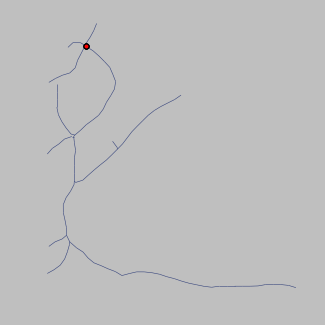

In [199]:
fig, ax = plt.subplots(figsize=(5,5))
n.plot(ax=ax, fig=fig, axis='z', linewidth=0.5, color=(52/256, 66/256, 123/256))

ax.axis('off')

ax.patch.set_alpha(0)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axis('off')
ax.set_aspect('equal')

ax.scatter( [x.x for x in n.branches], [x.y for x in n.branches], c='r', s=20, zorder=1000)

#fig.savefig('AAoverview.pdf')

In [113]:
# check what functions on statistics available
n

'#n,type,x,y,z,radius,parent\n'

In [18]:
# Define a function to calculate a large number of statistics inline
def fillStatsDict( a ):
    return {
        "num_tips":a.total_tip_nodes(),
        "cell_height":a.total_height(),
        "cell_width":a.total_width(),
        "total_branch_nodes":a.total_branch_nodes(),
#         "total_child_nodes":a.total_child_nodes(), 
#        "all_segment_lengths": a.all_segment_lengths(),
        "avg_thickness":a.average_thickness(),
        "max_branch_order":a.max_branching_order(),
        "max_segment":a.max_segment_length(),
        "max_path_angle":a.max_path_angle(),
        "min_branch_angle":a.min_branch_angle(),
        "avg_branch_angle":a.avg_branch_angle(),
        "max_branch_angle":a.max_branch_angle(),
        "max_tortuosity": a.max_tortuosity(),
#        "soma_surface_area": a.soma_surface_area()
    }

In [19]:
fillStatsDict(n)

{'num_tips': 14,
 'cell_height': 407.53200000000004,
 'cell_width': 392.977,
 'total_branch_nodes': 12,
 'avg_thickness': 6.383130645161288,
 'max_branch_order': 4,
 'max_segment': 172.1558836548284,
 'max_path_angle': 180.0,
 'min_branch_angle': 51.07062825793261,
 'avg_branch_angle': 75.48603077268656,
 'max_branch_angle': 127.77806477999029,
 'max_tortuosity': 0.2179097167884266}

# #3. analysis of a group of neurons features

In [20]:
# get the swc list in the current folder
!ls -a *.swc > list.txt
# Load the files
files = [ Neuron.from_swc(x) for x in open('list.txt').read().splitlines() ]
files

[{Neuron of 1 branches and 0 soma layers},
 {Neuron of 4 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 4 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 4 branches and 1 soma layers},
 {Neuron of 1 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 2 branches and 1 soma layers},
 {Neuron of 3 branches and 1 soma layers}]

In [209]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


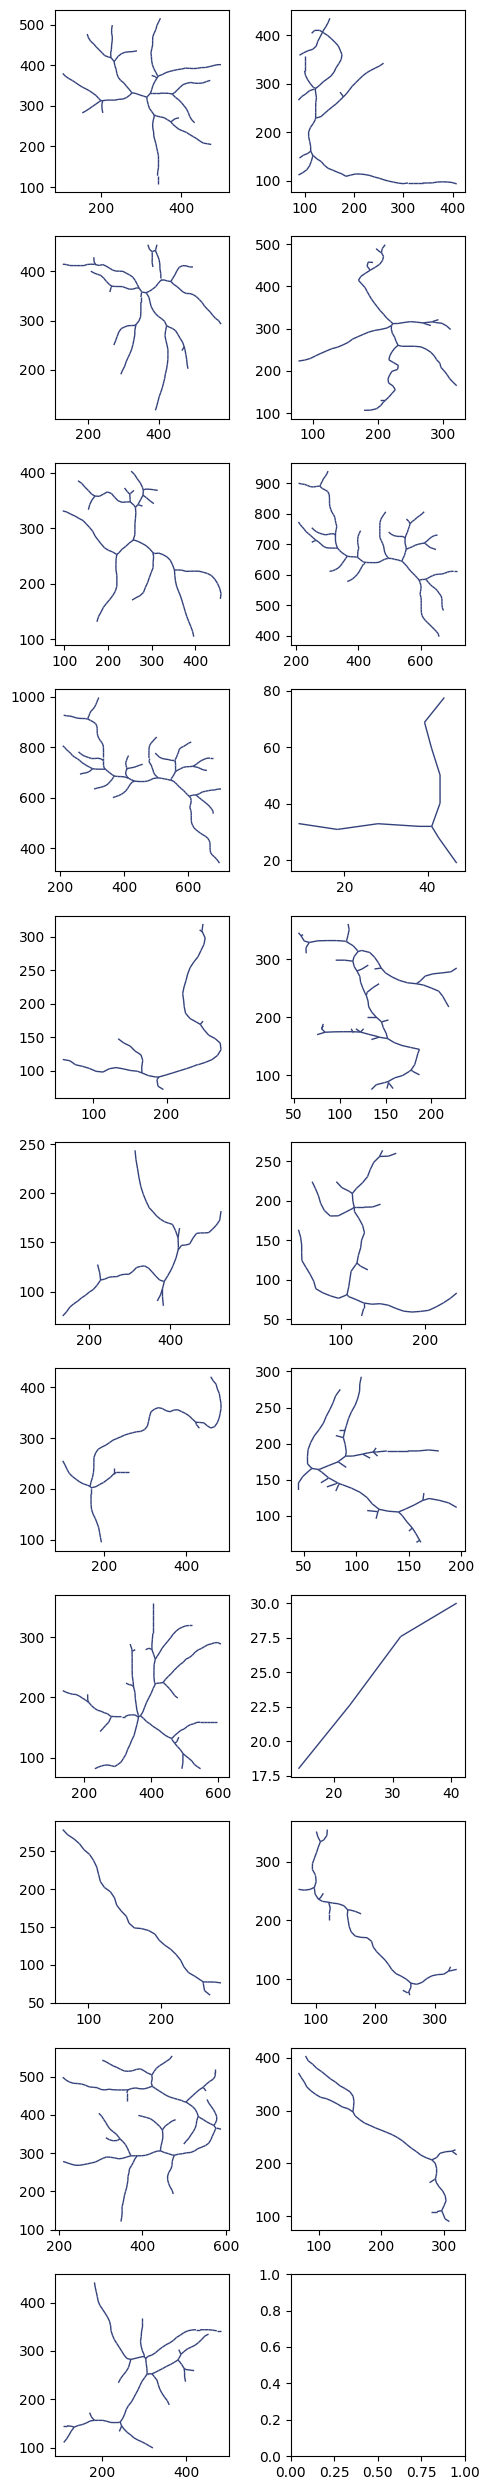

In [217]:
plt.style.use('default')
# Define the subplot structure
num_plots = len(files)
num_cols = 2  # Number of columns in each row
num_rows = (num_plots + num_cols - 1) // num_cols

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 25))

for i, column in enumerate(files):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
#    ax.axis('off')
    files[i].plot(fig=fig, ax=ax, color=(52/256, 66/256, 123/256) )

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Adjust and save the figure
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig( 'PanelOverview.pdf', transparent=True )

List all functions/paramaters

In [ ]:
%%time
error_log = {}
output_log = {}
methods = []
for method in dir(n):
    if method.startswith('__'):
        continue
    
    try:
        methods.append(method)
        res = getattr(n,method)()
        output_log[method] = res
    except TypeError:
        error_log[method] = "TypeError"
    except ValueError:
        error_log[method] = "ValueError"

In [158]:
methods

['add_branch',
 'add_soma_points',
 'all_branch_angles',
 'all_branch_orders',
 'all_branch_points',
 'all_neurites_tortuosities',
 'all_path_angles',
 'all_segment_lengths',
 'arbor_dist',
 'average_thickness',
 'avg_branch_angle',
 'branch_angles_histogram',
 'branch_angles_x_branch_orders',
 'branch_angles_x_path_distances',
 'branch_order_counts',
 'branch_order_histogram',
 'branches',
 'center_soma',
 'euclidean_distances_to_soma_histogram',
 'fix_parents',
 'from_swc',
 'from_swc_text',
 'get_main_branch',
 'iter_all_points',
 'max_branch_angle',
 'max_branching_order',
 'max_partition_asymmetry',
 'max_path_angle',
 'max_segment_length',
 'max_tortuosity',
 'median_path_angle',
 'median_tortuosity',
 'metadata',
 'min_branch_angle',
 'min_partition_asymmetry',
 'path_angle_x_branch_order',
 'path_angle_x_path_distance',
 'path_angles_histogram',
 'path_distances_to_soma_histogram',
 'persistence_diagram',
 'plot',
 'rotate',
 'scale',
 'segment_length_histogram',
 'slice_perime

[Text(0.5, 0, ''), Text(0, 0.5, 'max_branching_order')]

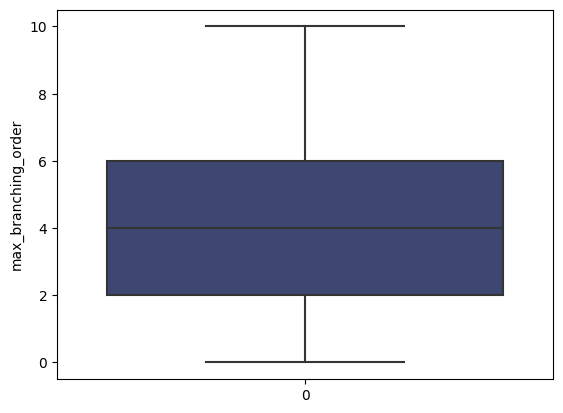

In [229]:
# Do the plot
plt.style.use('default')
sns.boxplot( [ x.max_branching_order() for x in files ], color=(52/256, 66/256, 123/256)).set(
    xlabel='', 
    ylabel='max_branching_order'
)

# Reformat so it is the right size
#fig = plt.gcf()

[Text(0.5, 0, ''), Text(0, 0.5, 'total_branch_nodes')]

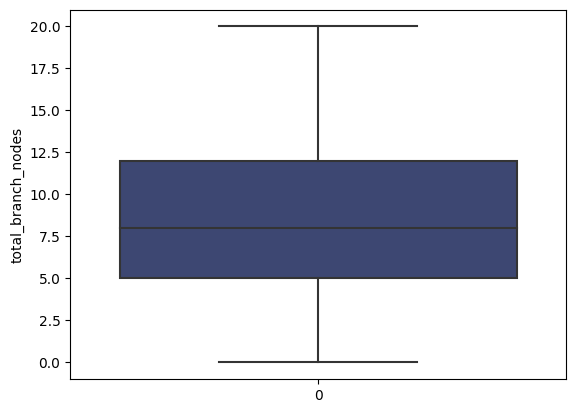

In [230]:
# Do the plot
sns.boxplot( [ x.total_branch_nodes () for x in files ], color=(52/256, 66/256, 123/256) ).set(
    xlabel='', 
    ylabel='total_branch_nodes'
)

PCA

https://github.com/Cai-Lab-at-University-of-Michigan/nGauge/blob/master/tutorials/make_figure_five/clustering_public_data.ipynb

In [220]:
#from ngauge import Neuron as n
from glob import glob

from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

#import wrapper as w
#import clustering as c

In [92]:
# Create three lists to include the neuron objects, cell type labels, and the
# morphometric stats calculated from each neuron
neurons = []
cell_labels = []
neuron_quantification = [] 

# Loop through all SWC files
for nname in glob("/content/*.swc"):
    # Identify what group it is from file name
#    group_name = nname.split('/')[2]
    
    # Read neuron and save to list
    neurons.append( n.from_swc( nname ) )
    
    # Add cell type label to list of labels'
    short_name = nname.split('/')[-1]
    short_name = short_name.split('.tif')[0]
    cell_labels += [short_name]
    
    # Add quatification for each cell
    try:
    # Call the function
        neuron_quantification.append( list(fillStatsDict(neurons[-1]).values()) )
    except Exception as e:
        # Print an error message and continue
        print(f"Error processing {nname}: {e}")
        neurons.pop() # remove if it has bad parameters
        cell_labels.pop()
        continue

Error processing /content/BinNeuron_3.tif_x257_y77_z0_app2.swc: min() arg is an empty sequence
Error processing /content/BinNeuron_32.tif_x41_y30_z0_app2.swc: min() arg is an empty sequence
Error processing /content/BinNeuron_20.tif_x41_y32_z0_app2.swc: min() arg is an empty sequence


In [93]:
cell_labels

['BinNeuron_30',
 'BinNeuron_0',
 'BinNeuron_16',
 'BinNeuron_24',
 'BinNeuron_23',
 'BinNeuron_11',
 'BinNeuron_17',
 'BinNeuron_27',
 'BinNeuron_7',
 'BinNeuron_8',
 'BinNeuron_6',
 'BinNeuron_21',
 'BinNeuron_26',
 'BinNeuron_14',
 'BinNeuron_15',
 'BinNeuron_28',
 'BinNeuron_18',
 'BinNeuron_4']

In [70]:
neuron_quantification

[[16,
  274.64869999999996,
  471.41,
  12,
  6.391918423913041,
  0.0,
  4,
  188.0369141408997,
  180.0,
  27.344318251707655,
  60.209851173296066,
  112.2576796978394,
  0.13746492703661675],
 [14,
  407.53200000000004,
  392.977,
  12,
  6.383130645161288,
  0.0,
  4,
  172.1558836548284,
  180.0,
  51.07062825793261,
  75.48603077268656,
  127.77806477999029,
  0.2179097167884266],
 [13,
  298.40599999999995,
  362.0076,
  10,
  5.59834056737589,
  0.0,
  5,
  150.28319903253458,
  179.8449512553568,
  39.42508266603295,
  75.15937789128543,
  115.5387829468707,
  0.36167204708656353],
 [7,
  168.8278,
  387.411,
  5,
  4.5224918918918915,
  0.0,
  2,
  160.74636008655855,
  178.62218379857026,
  38.06652502964841,
  61.28341388086953,
  101.504589536454,
  0.08664975549528577],
 [23,
  285.8474,
  172.5233,
  20,
  7.203321249999999,
  0.0,
  10,
  57.27557841754178,
  180.0,
  7.631468206753025,
  69.64999529940299,
  116.67935215800678,
  0.6106522415246085],
 [10,
  340.8819,

Explained Variance: [0.72273837 0.17309646]


<Figure size 2000x2000 with 0 Axes>

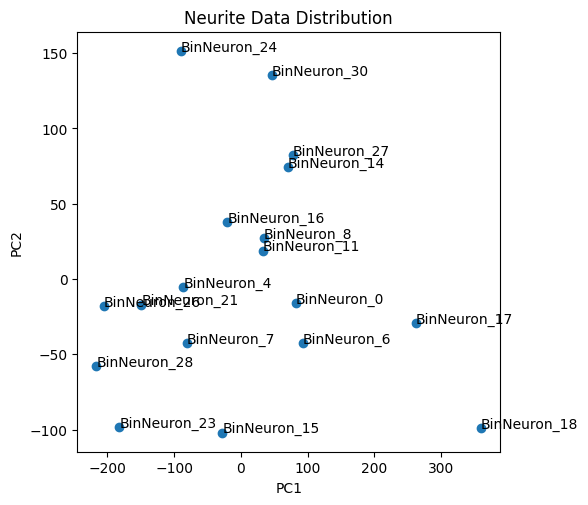

In [221]:
plt.figure(figsize=(20, 20))
pca = PCA(n_components=2, svd_solver='full')
allDim = pca.fit_transform(neuron_quantification)
pca = pca.fit(neuron_quantification)

print("Explained Variance:", pca.explained_variance_ratio_)

x_ob = allDim[:, 0]
y_ob = allDim[:, 1]

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(x_ob, y_ob)
plt.title("Neurite Data Distribution")
plt.xlabel("PC1")
plt.ylabel("PC2")
for i, txt in enumerate(cell_labels):
    plt.annotate(txt, (allDim[i, 0], allDim[i, 1]))

#plt.show()
plt.savefig('PCA.pdf',dpi=600)

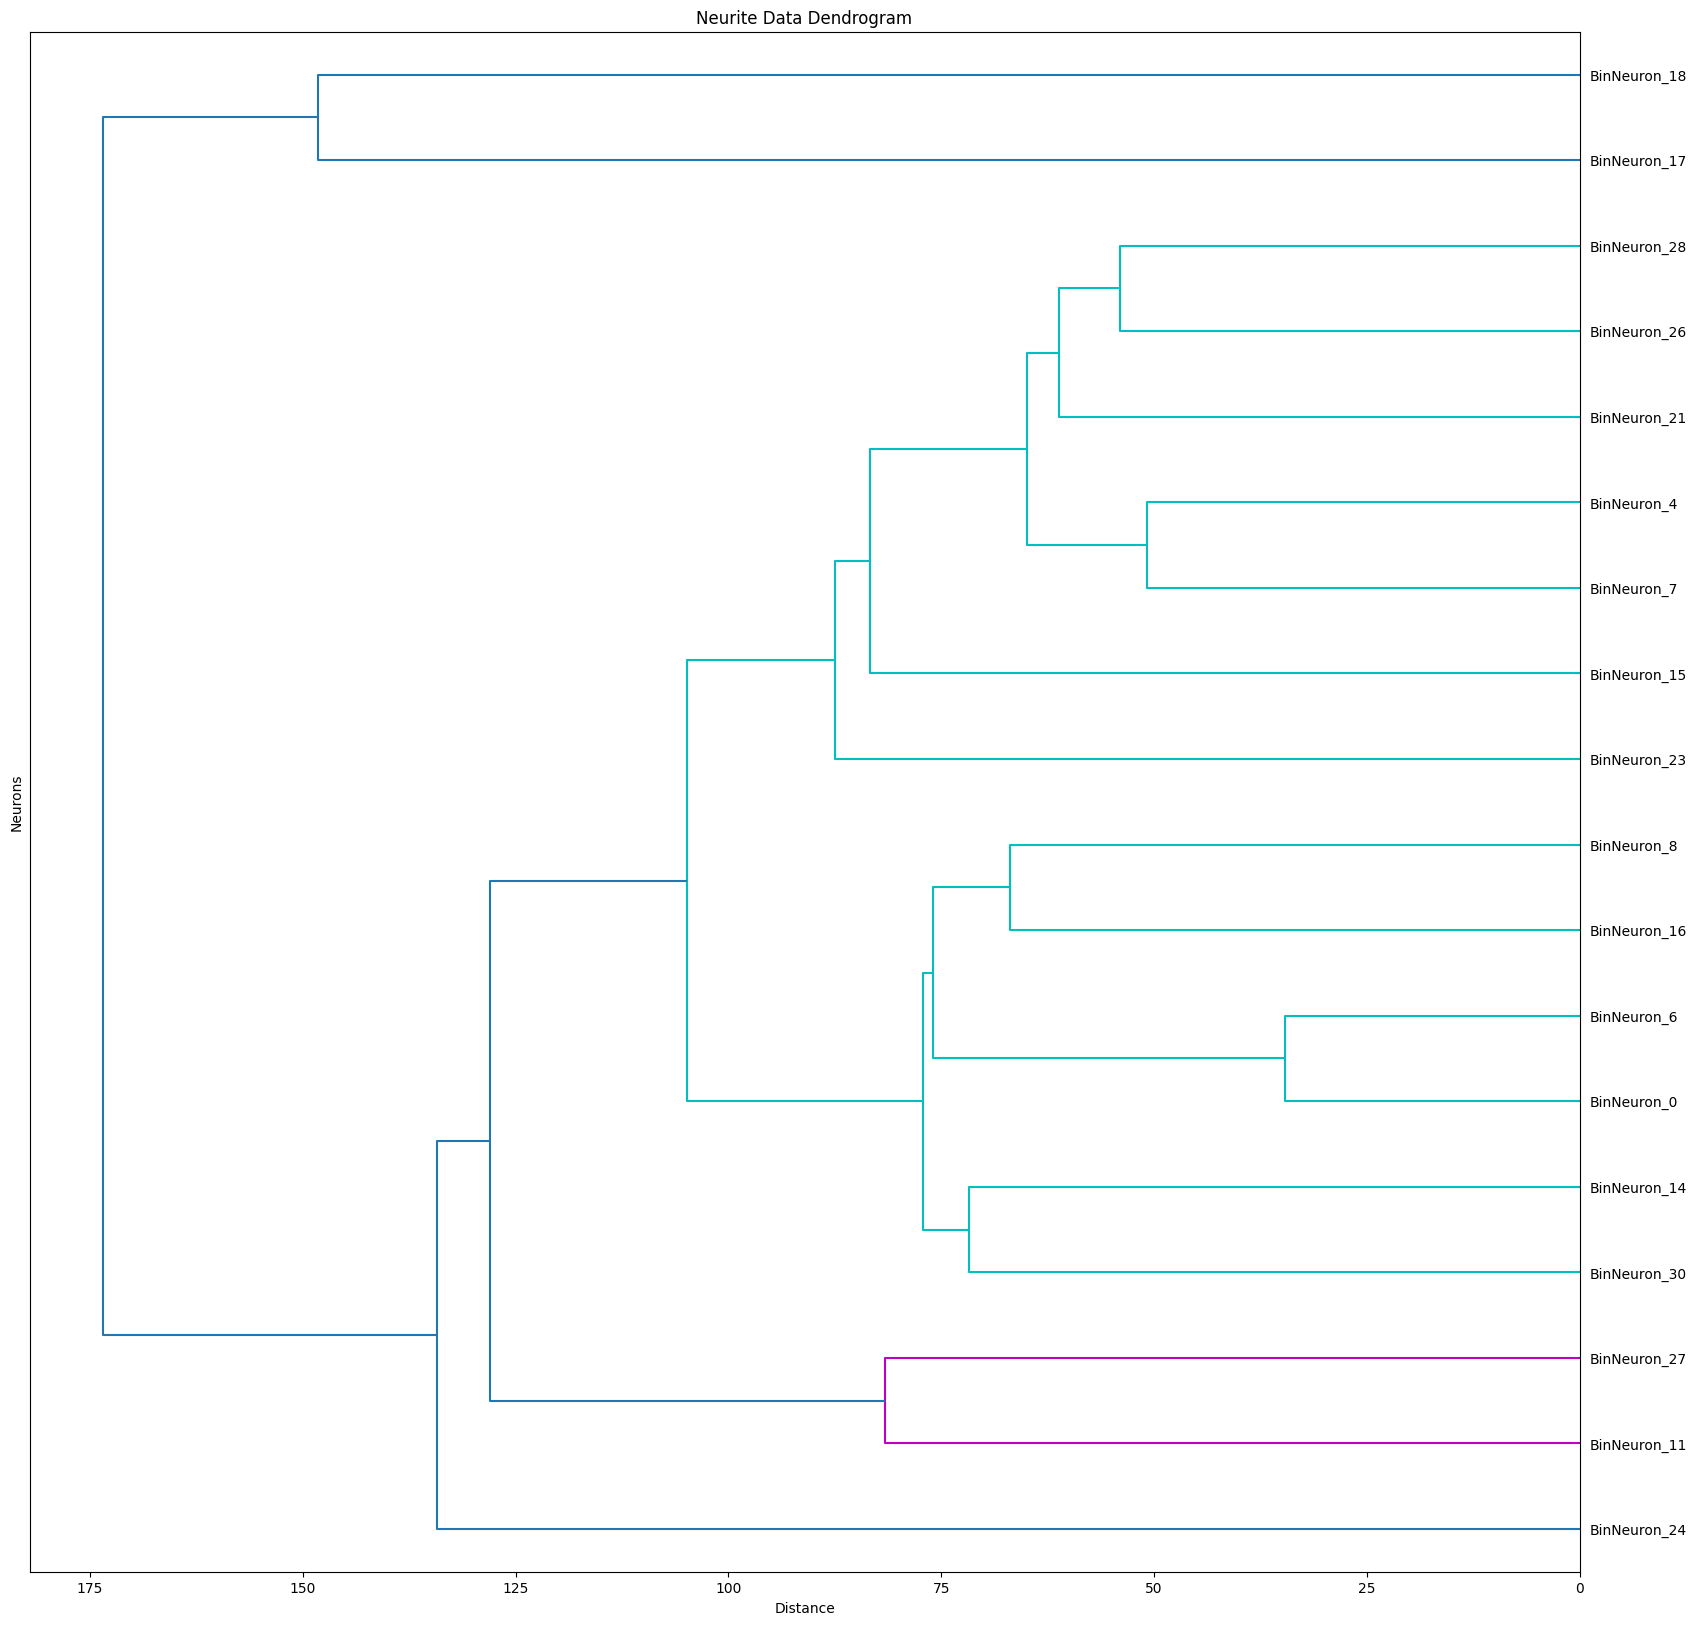

In [222]:
Z = hierarchy.linkage(neuron_quantification, 'single')
plt.figure(figsize=(20, 20))
plt.title("Neurite Data Dendrogram", fontdict = {'fontsize' : 12})
plt.ylabel('Neurons', fontdict = {'fontsize' : 10})
plt.xlabel('Distance', fontdict = {'fontsize' : 10})

# plot the top three levels of the dendrogram
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
dendrogram(Z, orientation = "left", labels=cell_labels, leaf_font_size = 10)
#plt.show()
plt.savefig('cluster.pdf',dpi=600)

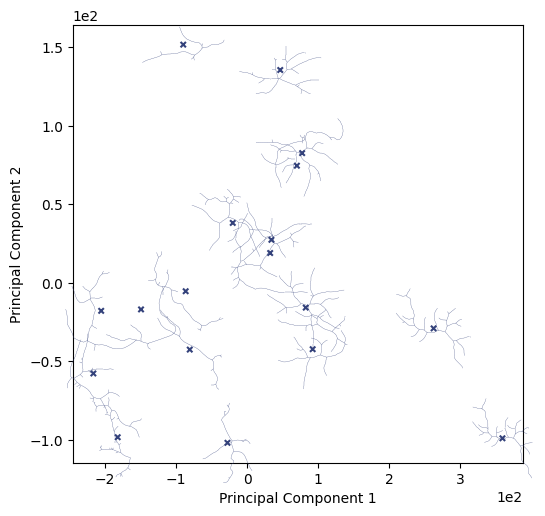

In [233]:
# Make a nice PCA figure
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
ax = fig.add_subplot(111)

x_bp = allDim[:, 0]
y_bp = allDim[:, 1]


# Plot data from PCA
ax.scatter(x_bp, y_bp, c=[ ( (115/256,196/256,132/256) if x==1 else (52/256, 66/256, 123/256) ) for x in cell_labels ], s=15, marker='x' )
#ax.scatter( [-2.5*10**7,3*10**7], [0,700], s=0)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

for i,_ in enumerate(neurons):
    # Find a coordinate to plot neuron subfigures
    toplot = [ 
        (x_bp[i]-xlim[0])/abs(xlim[1]-xlim[0]),
        (y_bp[i]-ylim[0])/abs(ylim[1]-ylim[0])
    ]
    
    # Make subfigure to plot each neuron
    ax_temp = ax.inset_axes([toplot[0]-.1,toplot[1]-0.1,0.2,0.2])
    ax_temp.patch.set_alpha(0)
    ax_temp.xaxis.set_ticklabels([])
    ax_temp.yaxis.set_ticklabels([])
    ax_temp.axis('off')
    ax_temp.set_aspect('equal')

    # Plot each Neuron
    color=[ ( (115/256,196/256,132/256) if x==1 else (52/256, 66/256, 123/256) ) for x in cell_labels ][i]
    neurons[i].plot(ax=ax_temp, fig=fig, color=color, axis='z', linewidth=.2)

# Label Axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Change plotting parameters
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)

# Save Figure to PDF

Show distribution on heatmap

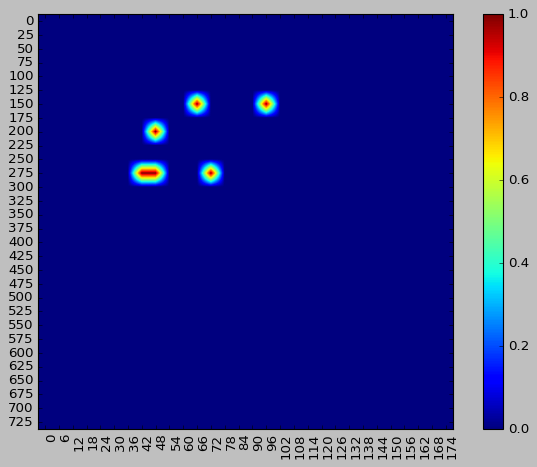

In [235]:
plt.style.use('classic')
# Calculate the histogram and split
res = n.branch_angles_x_path_distances(bins=30, maxDist=750)
matrix = res[0]
yaxs = list( map( int, res[1][:-1] ) )
xaxs = list( map( int, res[2][:-1] ) )

# Create a figure and plot the matrix
fig, ax = plt.subplots()
im = ax.imshow(matrix)

# Set the tix labels
ax.set_xticks( np.arange(len(xaxs)) )
ax.set_yticks( np.arange(len(yaxs)) )
ax.set_xticklabels(xaxs)
ax.set_yticklabels(yaxs)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Format and save fig
fig.colorbar(im)
fig.tight_layout()
#fig.savefig( 'panelAA.pdf', dpi=750 )